[PyTorch Toutrials](https://learnopencv.com/getting-started-with-pytorch/)

![alt text](c3_w1_pytorch_basics_cover.jpg)


Table of Contents
1. Converting Image to tensors

2. Introduction to Tensors and its Operations

3. Conclusion

In [ ]:
# Use this if you have conda installed
# !conda install -c pytorch pytorch

# Use this if you are on Google Colab or don't have conda installed
# !pip3 install torch

In [11]:
import requests

urls = [
    ("https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg", "mnist_0.jpg"),
    ("https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg", "mnist_1.jpg")
]

headers = {'User-Agent': 'Mozilla/5.0'}

for url, filename in urls:
    r = requests.get(url, headers=headers)
    if r.status_code == 200:
        with open(filename, "wb") as f:
            f.write(r.content)
    else:
        print(f"Failed to download {url}, status code: {r.status_code}")

In [ ]:
# Download some digit images from MNIST dataset (Google Colab)
# !wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "mnist_0.jpg"
# !wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "mnist_1.jpg"

In [1]:
import sys
print(sys.executable)

c:\Users\mr\anaconda3\python.exe


In [2]:
# !{sys.executable} -m pip install --upgrade --force-reinstall opencv-python

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
print(f"PyTorch Version : {torch.__version__}")

PyTorch Version : 2.7.1+cu118


### 1. *`Converting Images to Batched tensors`*

- Image is made up of pixel arrays that represent the intensity of pixels in grayscale or the color values in RGB format.
- When working with deep learning models, it's often necessary to convert these images into tensors, which are the `primary data structures used in PyTorch for handling and processing data`.

- Tensors: `multi-dimensional arrays similar to NumPy arrays, but with additional capabilities for GPU acceleration and automatic differentiation`. 
- Tensors are the `fundamental building blocks for representing data and parameters in neural networks`.

- Batches: Batching is a technique where `multiple data samples (images, in this case) are grouped together into a single tensor`. 

- This allows efficient processing of multiple samples simultaneously, to take advantage of the `parallel processing `capabilities of modern hardware.

- In the following block, we will see an example of `converting two MNIST images` into a `single batched tensor of shape [2,3,28,28]`

In [12]:
digit_0_array_og = cv2.imread("mnist_0.jpg")
digit_1_array_og = cv2.imread("mnist_1.jpg")

digit_0_array_gray = cv2.imread("mnist_0.jpg", cv2.IMREAD_GRAYSCALE)
digit_1_array_gray = cv2.imread("mnist_1.jpg", cv2.IMREAD_GRAYSCALE)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

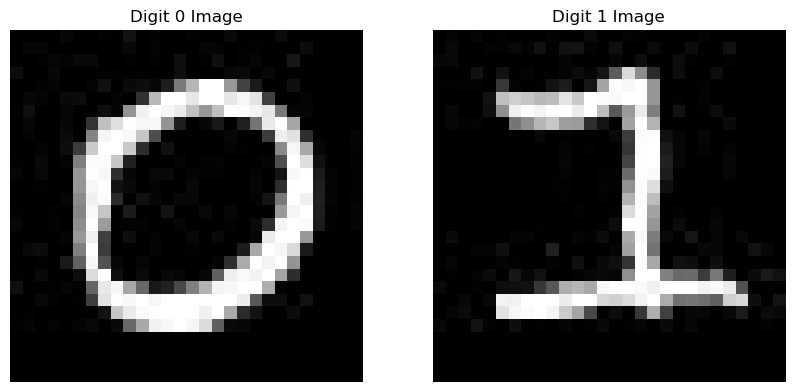

In [13]:
# Visualize the images
fig, ax = plt.subplots(1, 2, figsize=[10, 5])

ax[0].imshow(digit_0_array_og, cmap='gray', interpolation='none')
ax[0].set_title("Digit 0 Image")
ax[0].axis("off")

ax[1].imshow(digit_1_array_og, cmap='gray', interpolation='none')
ax[1].set_title("Digit 1 Image")
ax[1].axis("off")

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

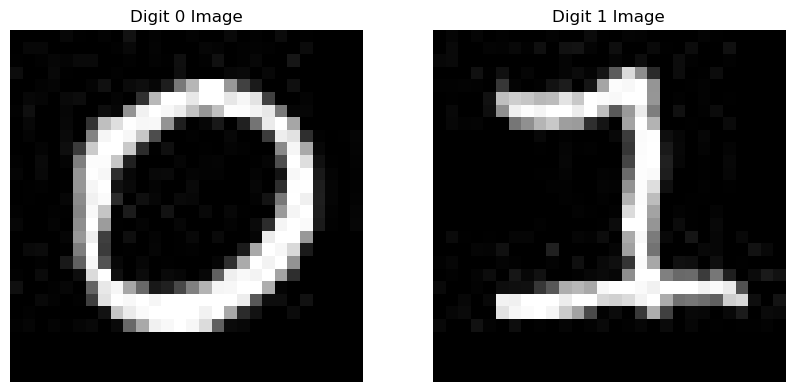

In [14]:
# Visualize the images
fig, ax = plt.subplots(1, 2, figsize=[10, 5])

ax[0].imshow(digit_0_array_gray, cmap='gray', interpolation='none')
ax[0].set_title("Digit 0 Image")
ax[0].axis("off")

ax[1].imshow(digit_1_array_gray, cmap='gray', interpolation='none')
ax[1].set_title("Digit 1 Image")
ax[1].axis("off")

In [ ]:
# Numpy array with three channels
print(f"Image Array Shape = {digit_0_array_og.shape}")

print(f"Min. Pixel Value = {np.min(digit_0_array_og)}")
print(f"Max. Pixel Value = {np.max(digit_0_array_og)}")

Image Array Shape = (28, 28, 3)
Min. Pixel Value = 0
Max. Pixel Value = 255


In [ ]:
# We will have a look at 28x28 single channel image's pixel values
digit_0_array_gray

array([[  0,   0,   0,   0,   7,   1,   0,   3,   0,  18,   0,   3,   0,
          0,   3,   0,   0,   9,   0,   2,   0,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   7,   7,   0,   0,   0,   0,   0,   2,   8,   0,   4,   0,
          0,   0,   6,   4,   0,   2,   3,   2,   0,   0,  11,   0,   0,
          0,   0],
       [  1,   0,   2,   6,   4,   9,   9,   0,   0,   2,   0,   3,   1,
         15,   0,   2,  16,   0,   2,   7,   0,   0,  22,   0,   0,   0,
          0,   0],
       [ 12,   0,   0,   8,   1,   0,   0,   0,   2,   0,   0,   0,   0,
         14,   0,   0,   0,   7,   9,   0,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   3,   5,   0,   0,   4,  16,   0,  10,  14,   6,  29,
        122, 182, 255, 255, 152,  66,  26,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   7,   5,   0,   9,  12,   0,   0,   4,   0,  49, 184, 255,
        255, 232, 255, 255, 231, 246, 227,  64,   0,   0,   4,   0,   0,
          0,   0],
       [  

#### *`1.1. Convert Numpy array to Torch tensors`*

In [15]:
# Convert the images to PyTorch tensors and normalize
# troch.tensor(___, dtype=)
# normalize -> means pixel values that are of range (0 -> 255) will be of range(0 -> 1)

img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32) / 255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32) / 255.0

In [16]:
print(f"Shape of Normalized Digit 0 Tensor = {img_tensor_0.shape}")
print(f"Shape of Normalized Digit 1 Tensor = {img_tensor_1.shape}")

print(f"Normalized Min. Pixel Value = {torch.min(img_tensor_0)}")
print(f"Normalized Max. Pixel Value = {torch.max(img_tensor_0)}")

Shape of Normalized Digit 0 Tensor = torch.Size([28, 28, 3])
Shape of Normalized Digit 1 Tensor = torch.Size([28, 28, 3])
Normalized Min. Pixel Value = 0.0
Normalized Max. Pixel Value = 1.0


- The Shape is the Same
- But, the range of normalized image is changed to be from 0 to 1 with floating point numbers in between.

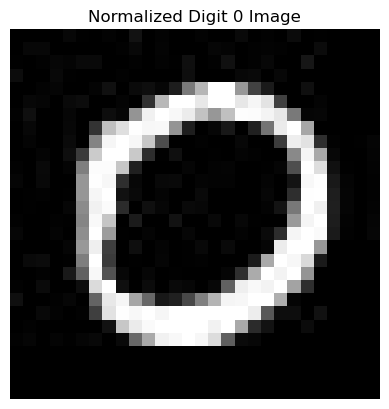

In [17]:
plt.imshow(img_tensor_0, cmap='gray')
plt.title("Normalized Digit 0 Image")
plt.axis("off")
plt.show()

#### *`1.2. Creating Input Batch`*
- From 2 Images (Tensors) -> Create 1 Batch (Group of Tensors)

In [18]:
batch_tensor = torch.stack([img_tensor_0, img_tensor_1])

# In PyTorch the forward pass of input images to the model is expected to have a batch_size > 1
print(f"Batch Tensor Shape = {batch_tensor.shape}")

Batch Tensor Shape = torch.Size([2, 28, 28, 3])


- Consist of `2 Tensors and each tensor's shape of [28, 28, 3] `

- Note: `Additionally in PyTorch, image tensors typically follow the shape convention [N ,C ,H ,W] unlike tensorflow which follows [N, H, W, C].`

- Therefore, we need to bring the `color channel to the second dimension`. This can be achieved using either torch.view() or torch.permute().

- Values:-
[2, 28, 28, 3]  ---> [2, 3, 28, 28]
- Indices:-
[0, 1,  2,  3]  ---> [0, 3,  1,  2]



In [19]:
# [N, C, H, W]
batch_input = batch_tensor.permute(0, 3, 1, 2)
print(f"Batch Tensor Shape = {batch_input.shape}")

Batch Tensor Shape = torch.Size([2, 3, 28, 28])


In [20]:
# [N, C, H, W]
batch_input = batch_tensor.view(2, 3, 28, 28)
print(f"Batch Tensor Shape = {batch_input.shape}")

Batch Tensor Shape = torch.Size([2, 3, 28, 28])


### 2.*`Introduction to Tensors and its Operations`*
- Tensor is simply a fancy name given to matrices. 
- If you are familiar with NumPy arrays, understanding and using PyTorch Tensors will be very easy. 
- A scalar value is represented by a 0-dimensional Tensor
- Similarly, a column/row matrix is represented using a 1-D Tensor and so on.
![alt text](PyTorch-Tensors.jpg)

#### *`2.1. Construct your first Tensor`*

- Create a Tensor with just ones in a column

In [21]:
a = torch.ones(5)
b = torch.ones((2, 3))

print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [22]:
# You can change the Datatype of Elements
a = torch.ones(5, dtype=torch.int32)
b = torch.ones((2, 3), dtype=torch.int64)

print(a)
print(b)

tensor([1, 1, 1, 1, 1], dtype=torch.int32)
tensor([[1, 1, 1],
        [1, 1, 1]])


- Create a Tensor with just zeros in a column

In [23]:
a = torch.zeros(5)
b = torch.zeros((5, 4))

print(a)
print(b)

tensor([0., 0., 0., 0., 0.])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


- We can similarly create Tensor with custom values as shown below.

In [24]:
# Tensor of 1 Dimension == Vector
t = torch.tensor([1, 2.5, 3.14, 12])
print(t)

print(t.shape)
print(t.size())
print(len(t))

tensor([ 1.0000,  2.5000,  3.1400, 12.0000])
torch.Size([4])
torch.Size([4])
4


- Now, let’s create some tensors of higher dimension.

In [25]:
# Matrix == Tensor of 2 Dimensions
f = torch.tensor([
    [1, 2, 3],
    [4, 5, 6]
], dtype=torch.float32)

f

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [26]:
# Tensor of 3 Dimensions
f = torch.tensor([[
        [1, 2, 3],
        [4, 5, 6]
    ],
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
], dtype=torch.float32)

print(f)
print(f.shape)
print(f.ndim)

tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]]])
torch.Size([2, 2, 3])
3


- Creates a tensor of size `size` filled with `fill_value`. 
- The tensor's dtype is inferred from fill_value.

In [27]:
# 2D Tensor
a = torch.full(size=(2, 3), fill_value=2.0)

# 1D Tensor
b = torch.full((3, ), 5)

print(a)
print(b)

print(a.dtype)
print(b.dtype)

tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([5, 5, 5])
torch.float32
torch.int64


#### *`2.2. Access an element in Tensor`*
- All indices starting from 0
- We can use Positive Indexing (0, 1, 2, ....) 
- and Negative Indexing (..., -3, -2, -1)

In [28]:
# 1D Tensor aka Vector -> [_]
t

tensor([ 1.0000,  2.5000,  3.1400, 12.0000])

In [29]:
# Get element at index 2
t[2]

tensor(3.1400)

- To access one particular element in a tensor, we will need to specify indices equal to the dimension of the tensor.
- That’s why for 1D-tensor we only had to specify one index.
- That’s why for 2D-tensor we only had to specify two indices.
- That’s why for 3D-tensor we only had to specify three indices.


In [30]:
# 2D Tensor Access -> [_][_]
a = torch.tensor([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0]
])

a

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [31]:
# All Elements
print(f[:])

tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]]])


In [32]:
# Access First Row
a[0]

tensor([1., 2., 3.])

In [33]:
# Access Second Row
a[1]

tensor([4., 5., 6.])

In [34]:
# Access First column
a[0:2, 0]

tensor([1., 4.])

In [35]:
# Access Second column
a[0:2, 1]

tensor([2., 5.])

In [36]:
# Get element at row 1, column 0
# a[1, 0]
# a[1][0]

a[1][0] == a[1, 0]

tensor(True)

In [37]:
# All elements from index 1 to 2 (excluding element 3)
print(a[1:3])

# All elements till index 4 (exclusive)
print(a[:4])

tensor([[4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [38]:
# 3D Tensor Access -> [_][_][_]

f

tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]]])

In [39]:
# All Elements
print(f[:])

tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]]])


In [40]:
# Similarly for 3D Tensor
f[1, 0, 0]

tensor(1.)

In [41]:
f[1][0][0]

tensor(1.)

In [42]:
f[1, 0, 0] == f[1][0][0]

tensor(True)

#### *`2.3. Specify data type of elements`*

- Whenever we create a tensor, PyTorch decides the data type of the elements of the tensor such that the data type can cover all the elements of the tensor.
- We can override this by specifying the data type while creating the tensor.

In [43]:
int_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(int_tensor.dtype)

torch.int64


In [44]:
# What if we changed any one element to floating point number?
int_tensor = torch.tensor([[1, 2, 3], [4.0, 5, 6]])
print(int_tensor.dtype)
print(int_tensor)

torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [45]:
# This can be overridden as follows
float_tensor = torch.tensor([[1, 2, 3], [4.0, 5, 6]])
int_tensor = float_tensor.type(torch.int64)

print(int_tensor.dtype)
print(int_tensor)

torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


#### *`2.4. Tensor to/from NumPy Array`*

In [46]:
# Tensor to Array
f_np = f.numpy()

f_np

array([[[1., 2., 3.],
        [4., 5., 6.]],

       [[1., 2., 3.],
        [4., 5., 6.]]], dtype=float32)

In [47]:
# Array to Tensor
f = torch.from_numpy(f_np)

f

tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]]])

#### *`2.5. Arithmetic Operations on Tensors`*

In [48]:
# Create tensor
tensor1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor2 = torch.tensor([[-1, 2, -3], [4, -5, 6]])

print(tensor1)
print(tensor2)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[-1,  2, -3],
        [ 4, -5,  6]])


In [49]:
# Addition
print(tensor1 + tensor2)

print(torch.add(tensor1, tensor2))

tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 0,  4,  0],
        [ 8,  0, 12]])


In [50]:
# Subtraction
print(tensor1 - tensor2)

print(torch.subtract(tensor1, tensor2))

tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])


In [51]:
# 1. Multiplication ---->> Tensor with Scalar
print(tensor1 * 2)

print(tensor1 * 5)

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
tensor([[ 5, 10, 15],
        [20, 25, 30]])


In [52]:
# 2. Tensor with another tensor ---->> Elementwise Multiplication
print(tensor1 * tensor2)

tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])


In [53]:
# 3. Matrix multiplication ---->> T1(N, M) * T2(M, C)
# The Inner Numbers must be the same
# The 2 Tensors must be of the same data type

print(tensor1.shape)

tensor3 = torch.tensor([
    [1, 2],
    [3, 4],
    [5, 7]
])

print(tensor3.shape)
print("-"*20)

print(tensor1)
print(tensor3)

print(f"Tensor1 * Tensor3 = ")
print("-"*20)
print(torch.mm(tensor1, tensor3))

torch.Size([2, 3])
torch.Size([3, 2])
--------------------
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 7]])
Tensor1 * Tensor3 = 
--------------------
tensor([[22, 31],
        [49, 70]])


In [54]:
# 1. Division Tensor ---->> with scalar
print(tensor1/2)

tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])


In [55]:
# 2. Tensor with another tensor ---->> Elementwise division
print(tensor1)
print(tensor2)
print("-"*22)
print("Tensor1 / Tensor2 = ")
print(tensor1/tensor2)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[-1,  2, -3],
        [ 4, -5,  6]])
----------------------
Tensor1 / Tensor2 = 
tensor([[-1.,  1., -1.],
        [ 1., -1.,  1.]])


#### *`2.6. Broadcasting`*

- a is a 1-dimensional tensor with shape ([ 3 ]).
- b is a scalar tensor with shape ([ 1 ]).
- When adding a and b, PyTorch broadcasts b to match the shape of a.

In [56]:
# Create two 1-dimensional tensors

a = torch.tensor([1, 2, 3])
b = torch.tensor(4)

# adding a scalar to a vector
result = a + b

print("Result of Broadcasting:\n", result)

Result of Broadcasting:
 tensor([5, 6, 7])


- When adding a and b, PyTorch broadcasts b to match the shape of a, resulting in ([ 1 + 4, 2 + 4, 3 + 4 ]).

- Broadcasting allows PyTorch to perform element-wise operations on tensors of

- a is a 2-dimensional tensor with shape ([1, 3]).

- b is a 2-dimensional tensor with shape ([3, 1]).

- When adding a and b, PyTorch broadcasts both tensors to the common shape ([3, 3]), resulting in:

In [57]:
# Create two tensors with shapes (1, 3) and (3, 1)
a = torch.tensor([[1, 2, 3]])
b = torch.tensor([[4], [5], [6]])

print(a)
print(a.shape)

print(b)
print(b.shape)

tensor([[1, 2, 3]])
torch.Size([1, 3])
tensor([[4],
        [5],
        [6]])
torch.Size([3, 1])


```[1, 2, 3]       [4][4][4]
[1, 2, 3]   +   [5][5][5]
[1, 2, 3]       [6][6][6]
```

In [58]:
result = a + b
print(result)
print(result.shape)

tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])
torch.Size([3, 3])


#### *`2.7. CPU v/s GPU Tensor`*

In [59]:
import torch

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("GPU count:", torch.cuda.device_count())

Torch version: 2.7.1+cu118
CUDA available: True
CUDA version: 11.8
GPU count: 1


In [60]:
!nvidia-smi

Wed Jan  7 18:21:36 2026       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.69       Driver Version: 516.69       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro M1000M      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P8    N/A /  N/A |    181MiB /  2048MiB |     22%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [61]:
# !pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu126

In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [63]:
# Create a tensor for CPU -> This will occupy CPU RAM
t_cpu = torch.tensor([
    [1.0, 2.0],
    [3.0, 4.0],
    [5.0, 6.0]
], device='cpu')

# Create a tensor for GPU -> This will occupy GPU RAM
t_gpu = torch.tensor([
    [1.0, 2.0],
    [3.0, 4.0],
    [5.0, 6.0]
], device='cuda')

In [64]:
# This uses CPU RAM
t_cpu = t_cpu * 5

# This uses GPU RAM --->> Focus on GPU RAM Consumption
t_gpu = t_gpu * 5

In [65]:
t_cpu, t_gpu

(tensor([[ 5., 10.],
         [15., 20.],
         [25., 30.]]),
 tensor([[ 5., 10.],
         [15., 20.],
         [25., 30.]], device='cuda:0'))

In [66]:
# We can move the GPU tensor to CPU and vice versa as shown below.

# Move GPU tensor to CPU
tensor_gpu_cpu = t_gpu.to(device='cpu')

# Move CPU tensor to GPU
tensor_cpu_gpu = t_cpu.to(device='cuda')